In [ ]:
# Importing required modules and helper functions for Logistic Regression modeling
import sys
notebook_path = sys.path.append(r'e:\Data science\Titanic dataset\notebooks')

# Importing main libraries
from auto_imports import *
model_results_imports()
from sklearn.preprocessing import OneHotEncoder , StandardScaler , RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV  # StratifiedKFold is already available in the notebook

### Data Preparation

Load and inspect the processed dataset for Logistic Regression.

In [2]:
# Load the processed dataset for Logistic Regression
logistic_df = pd.read_csv('E:\Data science\Titanic dataset\data\Processed data\Data Analysis\processed_data.csv')
logistic_df.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ind,...,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
0,1,0.0,3,male,22.0,1,0,7.2500,S,train,...,C,Mr,2,0,1,0,0,3.62500,0.329545,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,train,...,C,Mrs,2,0,1,0,0,35.64165,1.875876,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,train,...,C,Miss,1,1,1,0,0,7.92500,0.304808,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,train,...,C,Mrs,2,0,0,0,0,26.55000,1.517143,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,train,...,C,Mr,1,1,0,0,0,8.05000,0.230000,1


In [3]:
# Check info of the loaded dataset
logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             1309 non-null   int64  
 1   Survived                891 non-null    float64
 2   Pclass                  1309 non-null   int64  
 3   Sex                     1309 non-null   object 
 4   Age                     1309 non-null   float64
 5   SibSp                   1309 non-null   int64  
 6   Parch                   1309 non-null   int64  
 7   Fare                    1309 non-null   float64
 8   Embarked                1309 non-null   object 
 9   ind                     1309 non-null   object 
 10  cells_count             1309 non-null   int64  
 11  Cabin_letter            1309 non-null   object 
 12  Title                   1309 non-null   object 
 13  FamilySize              1309 non-null   int64  
 14  Is Alone                1309 non-null   

In [4]:
# Split the dataset into training and prediction sets
train_logistic_df = logistic_df.query('`ind` == "train"').drop(['ind' , 'PassengerId'] , axis=1)
predict_df = logistic_df.query('`ind` == "test"').drop(['ind' , 'Survived'] , axis=1)

In [5]:
# Preview the training data
train_logistic_df.head() # take a look on training data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cells_count,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
0,0.0,3,male,22.0,1,0,7.2500,S,3,C,Mr,2,0,1,0,0,3.62500,0.329545,1
1,1.0,1,female,38.0,1,0,71.2833,C,1,C,Mrs,2,0,1,0,0,35.64165,1.875876,2
2,1.0,3,female,26.0,0,0,7.9250,S,3,C,Miss,1,1,1,0,0,7.92500,0.304808,1
3,1.0,1,female,35.0,1,0,53.1000,S,1,C,Mrs,2,0,0,0,0,26.55000,1.517143,2
4,0.0,3,male,35.0,0,0,8.0500,S,3,C,Mr,1,1,0,0,0,8.05000,0.230000,1


In [6]:
# Show all unique values of categorical columns to determine encoding strategy
for col in train_logistic_df.select_dtypes('O').columns: # show all unique values of all categorical data to see the best encoding for them
    print(f'Column: {col}\n \n',train_logistic_df[col].unique(),'\n Count: ' , {len(train_logistic_df[col].unique())})

Column: Sex
 
 ['male' 'female'] 
 Count:  {2}
Column: Embarked
 
 ['S' 'C' 'Q'] 
 Count:  {3}
Column: Cabin_letter
 
 ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'F-G' 'F-E' 'T'] 
 Count:  {10}
Column: Title
 
 ['Mr' 'Mrs' 'Miss' 'Master' 'Others'] 
 Count:  {5}


One Hot Encoding will be used on all categorical columns

In [7]:
# Check info of the training data
train_logistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                891 non-null    float64
 1   Pclass                  891 non-null    int64  
 2   Sex                     891 non-null    object 
 3   Age                     891 non-null    float64
 4   SibSp                   891 non-null    int64  
 5   Parch                   891 non-null    int64  
 6   Fare                    891 non-null    float64
 7   Embarked                891 non-null    object 
 8   cells_count             891 non-null    int64  
 9   Cabin_letter            891 non-null    object 
 10  Title                   891 non-null    object 
 11  FamilySize              891 non-null    int64  
 12  Is Alone                891 non-null    int64  
 13  Is Special Agent/route  891 non-null    int64  
 14  TicketBatch             891 non-null    int64  

In [8]:
# Convert 'Survived' column data type from float64 to int64
train_logistic_df['Survived'] = train_logistic_df['Survived'].astype(int) # convert survived data type 
"""(float64 --> int64)"""

'(float64 --> int64)'

In [9]:
# Confirm the data type conversion
train_logistic_df['Survived'].dtype

dtype('int64')

In [10]:
# Preview the prediction data
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cells_count,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
891,892,3,male,34.5,0,0,7.8292,Q,3,C,Mr,1,1,0,0,0,7.829200,0.226933,1
892,893,3,female,47.0,1,0,7.0000,S,3,C,Mrs,2,0,0,0,0,3.500000,0.148936,1
893,894,2,male,62.0,0,0,9.6875,Q,3,C,Mr,1,1,0,0,0,9.687500,0.156250,1
894,895,3,male,27.0,0,0,8.6625,S,3,C,Mr,1,1,0,0,0,8.662500,0.320833,1
895,896,3,female,22.0,1,1,12.2875,S,3,C,Mrs,3,0,0,0,1,4.095833,0.558523,2


In [11]:
# see cells count

train_logistic_df['cells_count'].unique()

array([3, 1, 2, 0, 4])

In [12]:
# Check info of the prediction data
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Sex                     418 non-null    object 
 3   Age                     418 non-null    float64
 4   SibSp                   418 non-null    int64  
 5   Parch                   418 non-null    int64  
 6   Fare                    418 non-null    float64
 7   Embarked                418 non-null    object 
 8   cells_count             418 non-null    int64  
 9   Cabin_letter            418 non-null    object 
 10  Title                   418 non-null    object 
 11  FamilySize              418 non-null    int64  
 12  Is Alone                418 non-null    int64  
 13  Is Special Agent/route  418 non-null    int64  
 14  TicketBatch             418 non-null    int6

In [ ]:
# Split features and target variable
X = train_RF_df.drop(['Survived' , 'PassengerId'] , axis =1)
y= train_RF_df['Survived']

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

#### Transforming the features

##### Spliting features to categorical and numerical

In [14]:
standard_numerical_features = ['Age' , 'cells_count' , 'Fare per Person' , 'Fare per Age' , 'Tickets counts'] # numerical featueres that will standardrized
categorical_features = x.select_dtypes('O').columns.tolist()


print('numerical features: ' , standard_numerical_features)
print('categorical features: ', categorical_features)

numerical features:  ['Age', 'cells_count', 'Fare per Person', 'Fare per Age', 'Tickets counts']
categorical features:  ['Sex', 'Embarked', 'Cabin_letter', 'Title']


In [ ]:
# column transformer algorithm

preprocessor = ColumnTransformer(
    transformers=[
    ('standard_scaler', StandardScaler(), standard_numerical_features),  # transform to  standard scale
    ('fare', RobustScaler(), ['Fare']),   # transform to robust scale becuase of outlires 
    ('cat', OneHotEncoder(handle_unknown='ignore' ,drop='first' , dtype=int), categorical_features)
    ]
)

%store preprocessor # save it to use in the another models

Stored 'preprocessor' (ColumnTransformer)


#### Model training with hyperparmeter

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor' , preprocessor),
    ('logit' , LogisticRegression(class_weight='balanced'))
]) # makeing model

In [ ]:
# Hyperparameters tuning 
from sklearn.metrics import accuracy_score , f1_score , make_scorer , precision_score , recall_score
# scoring dict 
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score),
    'precision': make_scorer(precision_score , pos_label = 1),
    'recall' : make_scorer(recall_score, pos_label=1)
}
    # hyperparameters
param_grid = {
    'logit__random_state':[10 , 12 , 15 , 31],
    'logit__solver': ['liblinear', 'lbfgs', 'saga'],
    'logit__C':[0.1, 1, 10, 100],
    'logit__max_iter': [100, 1000, 2500, 5000],
    'logit__penalty': ['l1', 'l2', 'elasticnet'],
    'logit__fit_intercept': [True, False]
}

# grid search algorithm to find best hyperparameter
grid_search = GridSearchCV(pipeline ,
                           param_grid ,
                           cv=5 ,
                           scoring=scoring ,
                           refit='f1_score' , 
                           n_jobs=-1 , 
                           verbose=1)

grid_search.fit(X_train , y_train) # fit the model

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'logit__C': array([ 1. ... 10. ]), 'logit__fit_intercept': [True, False], 'logit__max_iter': [100, 1000, ...], 'logit__penalty': ['l1', 'l2', ...], ...}"
,scoring,"{'accuracy': make_scorer(a...hod='predict'), 'f1_score': make_scorer(f...hod='predict'), 'precision': make_scorer(p..., pos_label=1), 'recall': make_scorer(r..., pos_label=1)}"
,n_jobs,-1
,refit,'f1_score'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('standard_scaler', ...), ('fare', ...), ...]"


In [91]:
print(f'Best hyperparameters found: {grid_search.best_params_}')
print(f'\nBest cross valdiation f1 socres: {grid_search.best_score_:.4f}')

Best hyperparameters found: {'logit__C': np.float64(1.0), 'logit__fit_intercept': False, 'logit__max_iter': 100, 'logit__penalty': 'l2', 'logit__random_state': 10, 'logit__solver': 'saga'}

Best cross valdiation f1 socres: 0.7743


### Model Testing

Test the Logistic Regression model using the processed features.

In [92]:
# Test the Logistic Regression model
logit = grid_search.best_estimator_ 

In [93]:
# Evaluate model using cross-validation for accuracy and F1 score
accuracy , f1 = accuracy_f1_scores(X_train , y_train , logit)

CV=5 , random_state=42 , shuffel=True
accuracy:  0.8104402639613907
f1:  0.7665082584758041
   Accuracy score  F1 score
0        0.811189  0.765217
1        0.776224  0.724138
2        0.866197  0.834783
3        0.767606  0.722689
4        0.830986  0.785714


### Model Evaluation

Check model performance and drop percentages.

In [94]:
# Calculate accuracy and F1 drop percentages, and get predictions on the test set
accuracy_DP , f1_DP , y_pred = drop_percentages(X_test , y_test , logit , accuracy , f1).values()

print('Accuracy drop percentage: ', accuracy_DP)
print('F1 drop percentages: ' , f1_DP)

Accuracy drop percentage:  7.3%
F1 drop percentages:  8.6%


In [95]:
y_pred = logit.predict(X_test)

In [96]:
# Show classification report for predictions on the test set
print(classification_report(y_test , y_pred)) # seeing final report

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       110
           1       0.64      0.72      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179



intersection precision point:  0.7246376811594203
intersection recall point:  0.7246376811594203
intersection threshold point:  0.5615721177380677


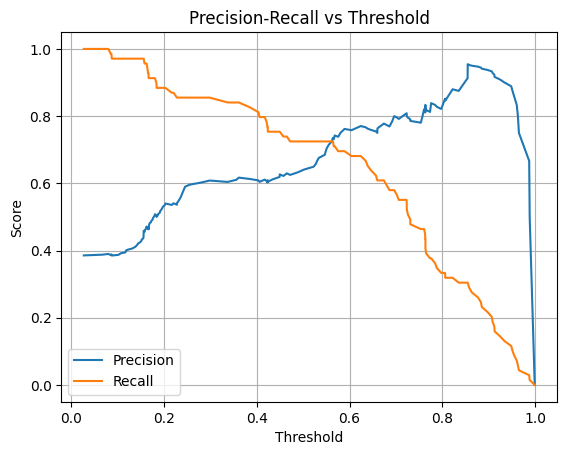

In [97]:
# Plot precision-recall curve to help select an optimal threshold
from sklearn.metrics import precision_recall_curve 

y_probs = logit.predict_proba(X_test)[:, 1]  # get probability of class 1

# calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
idx = np.argmin(np.abs(precision - recall))
precisoin_at_intersection = precision[idx]
recall_at_intersection = recall[idx]
threshold_at_intersection = thresholds[idx]
print('intersection precision point: ',precisoin_at_intersection)
print('intersection recall point: ' , recall_at_intersection)
print('intersection threshold point: ' , threshold_at_intersection)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

Select the threshold where precision and recall curves intersect for optimal balance.

In [98]:
# Find best threshold
y_pred_custom  =  y_probs >= threshold_at_intersection
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.72      0.72      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Model Results

- Accuracy: ≈ 78%
- F1: ≈ 77%
- Model is balanced
- No signs of overfitting or underfitting

> This model is well-fitted and strong.

The model is now tuned and ready for ensembling with other models.

[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

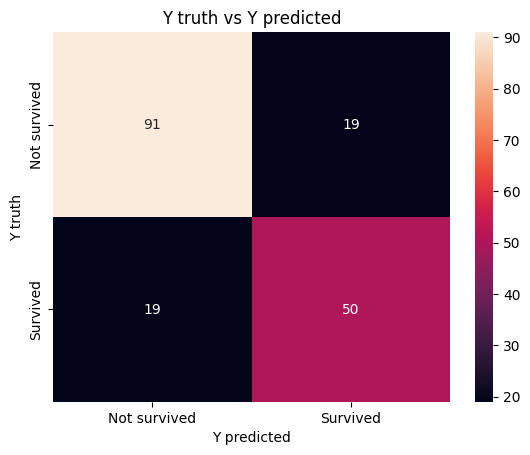

In [99]:
# Plot confusion matrix for the custom threshold predictions
cm = confusion_matrix(y_test , y_pred_custom)
plt.title('Y truth vs Y predicted')
ax = sns.heatmap(cm ,annot=True)
plt.xlabel('Y predicted')
plt.ylabel('Y truth')
ax.set_xticklabels(['Not survived' , 'Survived'])
ax.set_yticklabels(['Not survived' , 'Survived'])

In [100]:
# Preview processed features
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cells_count,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
0,3,male,22.0,1,0,7.2500,S,3,C,Mr,2,0,1,0,0,3.62500,0.329545,1
1,1,female,38.0,1,0,71.2833,C,1,C,Mrs,2,0,1,0,0,35.64165,1.875876,2
2,3,female,26.0,0,0,7.9250,S,3,C,Miss,1,1,1,0,0,7.92500,0.304808,1
3,1,female,35.0,1,0,53.1000,S,1,C,Mrs,2,0,0,0,0,26.55000,1.517143,2
4,3,male,35.0,0,0,8.0500,S,3,C,Mr,1,1,0,0,0,8.05000,0.230000,1


In [101]:
# Preview processed prediction data
predict_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cells_count,Cabin_letter,Title,FamilySize,Is Alone,Is Special Agent/route,TicketBatch,SharedTicket,Fare per Person,Fare per Age,Tickets counts
891,892,3,male,34.5,0,0,7.8292,Q,3,C,Mr,1,1,0,0,0,7.829200,0.226933,1
892,893,3,female,47.0,1,0,7.0000,S,3,C,Mrs,2,0,0,0,0,3.500000,0.148936,1
893,894,2,male,62.0,0,0,9.6875,Q,3,C,Mr,1,1,0,0,0,9.687500,0.156250,1
894,895,3,male,27.0,0,0,8.6625,S,3,C,Mr,1,1,0,0,0,8.662500,0.320833,1
895,896,3,female,22.0,1,1,12.2875,S,3,C,Mrs,3,0,0,0,1,4.095833,0.558523,2


In [102]:
# Check info of the prediction data
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Sex                     418 non-null    object 
 3   Age                     418 non-null    float64
 4   SibSp                   418 non-null    int64  
 5   Parch                   418 non-null    int64  
 6   Fare                    418 non-null    float64
 7   Embarked                418 non-null    object 
 8   cells_count             418 non-null    int64  
 9   Cabin_letter            418 non-null    object 
 10  Title                   418 non-null    object 
 11  FamilySize              418 non-null    int64  
 12  Is Alone                418 non-null    int64  
 13  Is Special Agent/route  418 non-null    int64  
 14  TicketBatch             418 non-null    int6

In [103]:
# Save model predictions for the prediction set for submission or ensembling
save_model_predictions((logit.predict_proba(
    predict_df.drop('PassengerId' , axis=1)
                                     )[: , 1] >= 0.59).astype(int),
                       'LogisticRegression'
                       )# Predicting predict data

In [104]:
# Save the trained Logistic Regression model for later use (e.g., in ensembling)
import joblib

model_filename = r'E:\Data science\Titanic dataset\Models\LogisticRegression.pkl'

joblib.dump(logit , model_filename)

"""Model saved successfully"""

'Model saved successfully'